sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023DC48CB160>,
      dtype=object)

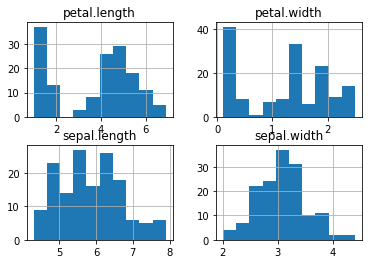

In [1]:
import pandas as pd

df = pd.read_csv("iris.csv")

print(df.isna().sum())

df.hist()

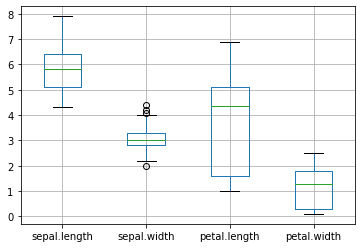

In [2]:
df.boxplot()

In [3]:
correlation = df.corr()
correlation

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [4]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
X = df.iloc[:,:4].values
Y = df.iloc[:,4].values

X,Y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)

from sklearn.metrics import accuracy_score

print(f"Accuracy by KNN: {accuracy_score(y_test, y_predict)*100}")

from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()

model2.fit(x_train, y_train)

y_predict2 = model2.predict(x_test)

print(f"Accuracy By Naive Bayers: {accuracy_score(y_test, y_predict2)}")
print(f"PREDIC BY KNN MODEL: {model1.predict([[6.5,2.8,4.6,1.5]])}")
print(f"PREDIC BY KNN MODEL: {model2.predict([[6.5,2.8,4.6,1.5]])}")

Accuracy by KNN: 98.33333333333333
Accuracy By Naive Bayers: 0.95
PREDIC BY KNN MODEL: ['Versicolor']
PREDIC BY KNN MODEL: ['Versicolor']


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.95      1.00      0.98        21
   Virginica       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,Y)

#Greater score has greater accuracy/ select by columns for training.
fit.scores_

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=9, test_size = 0.3)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

from sklearn.metrics import accuracy_score

print(f"Accuracy: {accuracy_score(y_test, y_predict)*100}%")

Accuracy: 100.0%


In [9]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(model, 4)
fit = rfe.fit(df.iloc[:,0:4],df.iloc[:,-1])

result_x = fit.transform(X)

print(f"Num Feature: {fit.n_features_}")
print(f"Num Feature: {fit.ranking_}")

Num Feature: 4
Num Feature: [1 1 1 1]


In [10]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut,KFold,cross_val_score

model = LogisticRegression()

loout = LeaveOneOut()
result = cross_val_score(model, X, Y, cv=loout)
print(result)
print(f"Accuracy: {result.mean()*100}%")
print(f"Correct OutPut by Model: {result.sum()}")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Accuracy: 96.66666666666667%
Correct OutPut by Model: 145.0


# Support Vector Machine
    
    |
    |  * *
    |  ** *  /  /          <-Hyperplane
    |  *  * /  /  /
    |      /  /  /
    |     /  /  /  *
    |    /  /  / *  * *
    |       /  *  * *
    |
    |--------------------------------
    |

In [46]:
from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)

y_predicted = model.predict(x_test)

from sklearn.metrics import accuracy_score

print(f"Accuracy by SVM: {accuracy_score(y_test, y_predict)*100}%")
print(f"Accuracy By Naive Bayers: {accuracy_score(y_test, y_predicted)}")
print(f"PREDIC BY KNN MODEL: {model.predict([[6.5,2.8,4.6,1.5]])}")
print(f"PREDIC BY KNN MODEL: {model.predict([[6.5,2.8,4.6,1.5]])}")

Accuracy by SVM: 95.55555555555556%
Accuracy By Naive Bayers: 0.9777777777777777
PREDIC BY KNN MODEL: ['Versicolor']
PREDIC BY KNN MODEL: ['Versicolor']


# Decision Tree

----------------------|<br>
|Age|Gender| Can Marry|<br>
|22    M     Yes      |<br>
|19    M     No       |<br>
|17    M     No       |<br>
|21    M     Yes      |<br>
|19    F     Yes      |<br>
|22    F     Yes      |<br>
|16    F     No       |<br>
_______________________<br>


To calculate the root node.<br>

1. Information Gain
2. Entropy
3. Proper Gain

In [12]:
from IPython.display import display, Math
display(Math("\\text{Info Gain = }\\frac{-P}{S*\\log(P/S)} - \\frac{N}{S\\log(N/S)}"))
display(Math("\\text{P->Probability of Yes | S->Probability of No}"))
display(Math("\\text{Entropy:} \\sum{\\frac{P_1+nN_1}{P+N}* (P_i, N_i)}"))
display(Math("\\text{PG}=I(P.N)-E"))
display(Math("\\text{S}= R_1+R_2+R_3"))
display(Math("R_1,R_2,R_3->Solution"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
display(Math("Entropy(Col) = P(P)*I(P)+P(N)*I(N)"))

<IPython.core.display.Math object>